**SA**

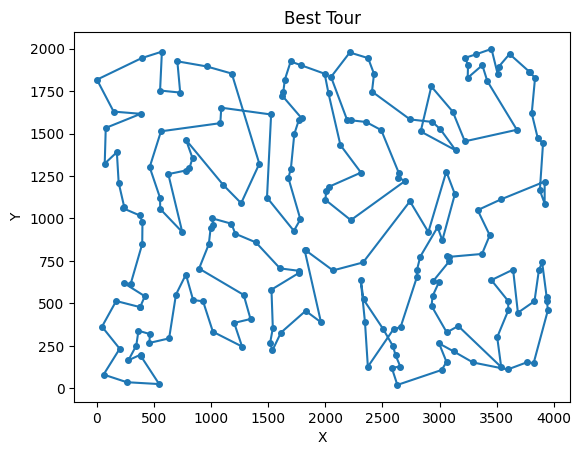

Optimal Path (City Numbers): 36 -> 41 -> 148 -> 102 -> 44 -> 130 -> 135 -> 19 -> 151 -> 200 -> 92 -> 119 -> 96 -> 137 -> 162 -> 18 -> 105 -> 24 -> 153 -> 160 -> 193 -> 144 -> 104 -> 55 -> 77 -> 103 -> 183 -> 140 -> 106 -> 159 -> 50 -> 164 -> 177 -> 154 -> 191 -> 143 -> 171 -> 22 -> 23 -> 88 -> 139 -> 173 -> 163 -> 54 -> 115 -> 72 -> 146 -> 152 -> 90 -> 21 -> 166 -> 108 -> 38 -> 20 -> 80 -> 127 -> 124 -> 47 -> 141 -> 37 -> 184 -> 65 -> 188 -> 79 -> 113 -> 179 -> 81 -> 56 -> 100 -> 101 -> 26 -> 62 -> 5 -> 197 -> 67 -> 198 -> 70 -> 149 -> 53 -> 170 -> 39 -> 40 -> 189 -> 111 -> 190 -> 117 -> 194 -> 132 -> 69 -> 150 -> 75 -> 30 -> 134 -> 181 -> 49 -> 138 -> 86 -> 68 -> 10 -> 123 -> 142 -> 122 -> 73 -> 85 -> 93 -> 11 -> 158 -> 28 -> 129 -> 91 -> 97 -> 99 -> 8 -> 76 -> 59 -> 175 -> 167 -> 32 -> 136 -> 29 -> 3 -> 95 -> 98 -> 107 -> 161 -> 1 -> 174 -> 12 -> 71 -> 61 -> 35 -> 172 -> 157 -> 131 -> 94 -> 180 -> 176 -> 27 -> 9 -> 25 -> 46 -> 169 -> 58 -> 84 -> 7 -> 34 -> 57 -> 178 -> 199 -> 145 -> 

In [ ]:
import math
import random
import matplotlib.pyplot as plt
import time

def load_dataset(file_path):
    cities = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines[6:-1]:
            parts = line.split()
            city_number = int(parts[0])
            x, y = float(parts[1]), float(parts[2])
            cities.append((city_number, x, y))
    return cities

def euclidean_distance(city1, city2):
    return math.sqrt((city1[1] - city2[1])**2 + (city1[2] - city2[2])**2)

def total_distance(cities, tour):
    distance = 0
    for i in range(len(tour) - 1):
        distance += euclidean_distance(cities[tour[i]], cities[tour[i + 1]])
    distance += euclidean_distance(cities[tour[-1]], cities[tour[0]])
    return distance

def two_opt_swap(tour, i, j):
    return tour[:i] + tour[i:j+1][::-1] + tour[j+1:]

def simulated_annealing(cities, initial_temp=200000, cooling_rate=0.9995, stopping_temp=1e-8, max_iter=500000):
    n = len(cities)
    current_tour = list(range(n))
    random.shuffle(current_tour)
    current_distance = total_distance(cities, current_tour)
    best_tour = current_tour[:]
    best_distance = current_distance

    temperature = initial_temp
    iter_count = 0

    while temperature > stopping_temp and iter_count < max_iter:
        i, j = sorted(random.sample(range(n), 2))
        new_tour = two_opt_swap(current_tour, i, j)
        new_distance = total_distance(cities, new_tour)

        delta = new_distance - current_distance
        if delta < 0 or random.random() < math.exp(-delta / temperature):
            current_tour = new_tour
            current_distance = new_distance
            if new_distance < best_distance:
                best_tour = new_tour
                best_distance = new_distance

        temperature *= cooling_rate
        iter_count += 1

    return best_tour, best_distance

def plot(cities, tour):
    tour_cities = [cities[i] for i in tour]
    tour_cities.append(tour_cities[0])
    x, y = zip(*[(city[1], city[2]) for city in tour_cities])
    plt.plot(x, y, 'o-', markersize=4)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Best Tour')
    plt.show()

    print("Optimal Path (City Numbers):", ' -> '.join(str(cities[i][0]) for i in tour) + ' -> ' + str(cities[tour[0]][0]))
    print("Total Distance (Optimal Path):", total_distance(cities, tour))

start_time = time.time()

cities = load_dataset("kroB200.txt")
best_tour, best_distance = simulated_annealing(cities)
plot(cities, best_tour)

end_time = time.time()

execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.4f} seconds")


**SA (deterministic) مسیر اولیه قطعی**

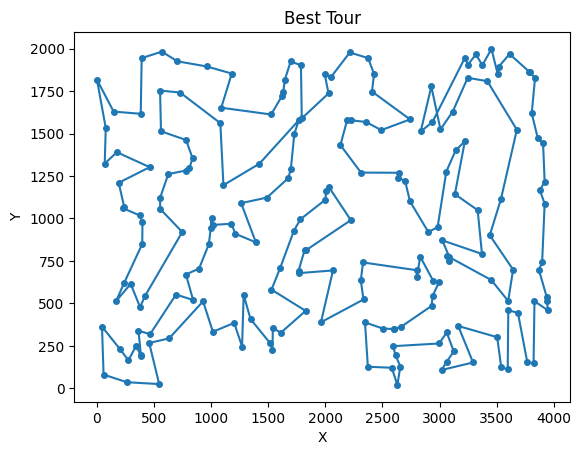

Optimal Path (City Numbers): 124 -> 127 -> 75 -> 30 -> 134 -> 181 -> 38 -> 80 -> 20 -> 72 -> 37 -> 184 -> 173 -> 115 -> 191 -> 154 -> 163 -> 54 -> 169 -> 7 -> 84 -> 58 -> 52 -> 116 -> 177 -> 143 -> 139 -> 88 -> 171 -> 23 -> 22 -> 104 -> 55 -> 193 -> 144 -> 160 -> 153 -> 162 -> 137 -> 135 -> 130 -> 44 -> 148 -> 102 -> 200 -> 92 -> 19 -> 151 -> 119 -> 96 -> 18 -> 24 -> 105 -> 77 -> 103 -> 106 -> 183 -> 140 -> 159 -> 50 -> 164 -> 185 -> 43 -> 196 -> 186 -> 60 -> 165 -> 89 -> 118 -> 182 -> 33 -> 147 -> 82 -> 64 -> 14 -> 125 -> 120 -> 42 -> 109 -> 2 -> 16 -> 45 -> 36 -> 17 -> 41 -> 192 -> 78 -> 155 -> 13 -> 187 -> 126 -> 63 -> 110 -> 48 -> 31 -> 195 -> 51 -> 156 -> 121 -> 128 -> 112 -> 15 -> 6 -> 4 -> 83 -> 87 -> 114 -> 168 -> 133 -> 66 -> 145 -> 74 -> 178 -> 199 -> 131 -> 157 -> 172 -> 35 -> 61 -> 71 -> 27 -> 176 -> 180 -> 94 -> 57 -> 34 -> 9 -> 25 -> 46 -> 146 -> 152 -> 108 -> 90 -> 1 -> 95 -> 21 -> 123 -> 68 -> 166 -> 86 -> 49 -> 138 -> 111 -> 190 -> 189 -> 10 -> 142 -> 3 -> 29 -> 32 -> 

In [ ]:
import math
import random
import matplotlib.pyplot as plt
import time

def load_dataset(file_path):
    cities = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines[6:-1]:
            parts = line.split()
            city_number = int(parts[0])
            x, y = float(parts[1]), float(parts[2])
            cities.append((city_number, x, y))
    return cities

def euclidean_distance(city1, city2):
    return math.sqrt((city1[1] - city2[1])**2 + (city1[2] - city2[2])**2)

def total_distance(cities, tour):
    distance = 0
    for i in range(len(tour) - 1):
        distance += euclidean_distance(cities[tour[i]], cities[tour[i + 1]])
    distance += euclidean_distance(cities[tour[-1]], cities[tour[0]])
    return distance

def two_opt_swap(tour, i, j):
    return tour[:i] + tour[i:j+1][::-1] + tour[j+1:]

def simulated_annealing(cities, initial_temp=200000, cooling_rate=0.9995, stopping_temp=1e-8, max_iter=500000):
    n = len(cities)

    # مسیر اولیه قطعی
    current_tour = list(range(n))
    current_distance = total_distance(cities, current_tour)

    best_tour = current_tour[:]
    best_distance = current_distance

    temperature = initial_temp
    iter_count = 0

    while temperature > stopping_temp and iter_count < max_iter:
        i, j = sorted(random.sample(range(n), 2))
        new_tour = two_opt_swap(current_tour, i, j)
        new_distance = total_distance(cities, new_tour)

        delta = new_distance - current_distance
        if delta < 0 or random.random() < math.exp(-delta / temperature):
            current_tour = new_tour
            current_distance = new_distance
            if new_distance < best_distance:
                best_tour = new_tour
                best_distance = new_distance

        temperature *= cooling_rate
        iter_count += 1

    return best_tour, best_distance

def plot(cities, tour):
    tour_cities = [cities[i] for i in tour]
    tour_cities.append(tour_cities[0])
    x, y = zip(*[(city[1], city[2]) for city in tour_cities])
    plt.plot(x, y, 'o-', markersize=4)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Best Tour')
    plt.show()

    print("Optimal Path (City Numbers):", ' -> '.join(str(cities[i][0]) for i in tour) + ' -> ' + str(cities[tour[0]][0]))
    print("Total Distance (Optimal Path):", total_distance(cities, tour))

start_time = time.time()

cities = load_dataset("kroB200.txt")
best_tour, best_distance = simulated_annealing(cities)
plot(cities, best_tour)

end_time = time.time()

execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.4f} seconds")


**SA (deterministic) انتخاب قطعی دو شهر برای جابه جایی**

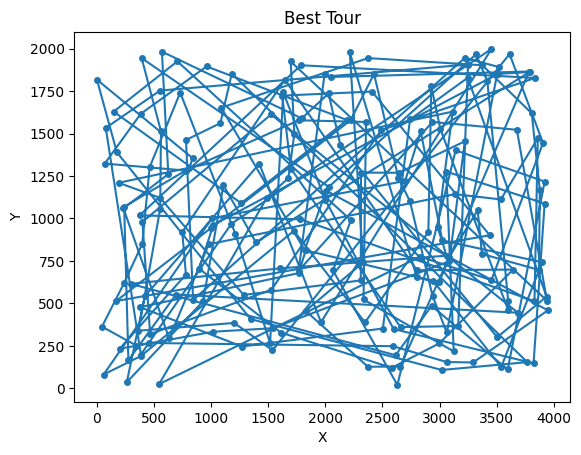

Optimal Path (City Numbers): 173 -> 89 -> 45 -> 130 -> 153 -> 118 -> 164 -> 129 -> 8 -> 140 -> 77 -> 88 -> 179 -> 101 -> 189 -> 20 -> 133 -> 16 -> 105 -> 102 -> 160 -> 171 -> 49 -> 95 -> 9 -> 34 -> 37 -> 55 -> 109 -> 63 -> 98 -> 108 -> 138 -> 177 -> 17 -> 79 -> 75 -> 5 -> 122 -> 1 -> 81 -> 115 -> 169 -> 15 -> 156 -> 185 -> 94 -> 6 -> 121 -> 31 -> 120 -> 165 -> 176 -> 184 -> 26 -> 90 -> 73 -> 67 -> 124 -> 58 -> 168 -> 22 -> 50 -> 33 -> 110 -> 78 -> 192 -> 148 -> 92 -> 137 -> 188 -> 100 -> 62 -> 198 -> 84 -> 163 -> 83 -> 172 -> 136 -> 158 -> 85 -> 170 -> 68 -> 123 -> 86 -> 113 -> 47 -> 139 -> 72 -> 157 -> 80 -> 181 -> 132 -> 53 -> 166 -> 161 -> 46 -> 106 -> 44 -> 19 -> 116 -> 141 -> 152 -> 107 -> 174 -> 117 -> 190 -> 29 -> 59 -> 7 -> 128 -> 82 -> 2 -> 119 -> 144 -> 23 -> 97 -> 93 -> 111 -> 38 -> 135 -> 43 -> 196 -> 60 -> 66 -> 70 -> 3 -> 12 -> 154 -> 199 -> 131 -> 91 -> 134 -> 54 -> 191 -> 36 -> 193 -> 65 -> 71 -> 32 -> 149 -> 194 -> 57 -> 178 -> 74 -> 112 -> 42 -> 187 -> 162 -> 103 -> 2

In [ ]:
import math
import random
import matplotlib.pyplot as plt
import time

def load_dataset(file_path):
    cities = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines[6:-1]:
            parts = line.split()
            city_number = int(parts[0])
            x, y = float(parts[1]), float(parts[2])
            cities.append((city_number, x, y))
    return cities

def euclidean_distance(city1, city2):
    return math.sqrt((city1[1] - city2[1])**2 + (city1[2] - city2[2])**2)

def total_distance(cities, tour):
    distance = 0
    for i in range(len(tour) - 1):
        distance += euclidean_distance(cities[tour[i]], cities[tour[i + 1]])
    distance += euclidean_distance(cities[tour[-1]], cities[tour[0]])
    return distance

def two_opt_swap(tour, i, j):
    return tour[:i] + tour[i:j+1][::-1] + tour[j+1:]

def simulated_annealing(cities, initial_temp=200000, cooling_rate=0.9995, stopping_temp=1e-8, max_iter=500000):
    n = len(cities)
    current_tour = list(range(n))
    random.shuffle(current_tour)
    current_distance = total_distance(cities, current_tour)
    best_tour = current_tour[:]
    best_distance = current_distance

    temperature = initial_temp
    iter_count = 0

    while temperature > stopping_temp and iter_count < max_iter:

        # انتخاب قطعی i و j
        i = iter_count % (n - 1)
        j = i + 1

        new_tour = two_opt_swap(current_tour, i, j)
        new_distance = total_distance(cities, new_tour)

        delta = new_distance - current_distance
        if delta < 0 or random.random() < math.exp(-delta / temperature):
            current_tour = new_tour
            current_distance = new_distance
            if new_distance < best_distance:
                best_tour = new_tour
                best_distance = new_distance

        temperature *= cooling_rate
        iter_count += 1

    return best_tour, best_distance

def plot(cities, tour):
    tour_cities = [cities[i] for i in tour]
    tour_cities.append(tour_cities[0])
    x, y = zip(*[(city[1], city[2]) for city in tour_cities])
    plt.plot(x, y, 'o-', markersize=4)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Best Tour')
    plt.show()

    print("Optimal Path (City Numbers):", ' -> '.join(str(cities[i][0]) for i in tour) + ' -> ' + str(cities[tour[0]][0]))
    print("Total Distance (Optimal Path):", total_distance(cities, tour))

start_time = time.time()

cities = load_dataset("kroB200.txt")
best_tour, best_distance = simulated_annealing(cities)
plot(cities, best_tour)

end_time = time.time()

execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.4f} seconds")


**SA (deterministic) فقط جواب بهتر پذیرفته می‌شود**

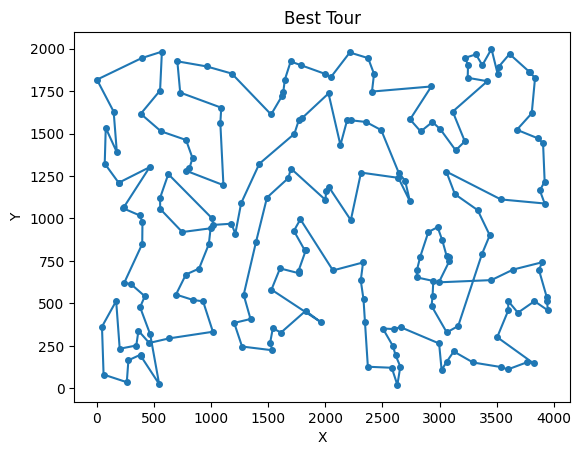

Optimal Path (City Numbers): 63 -> 31 -> 195 -> 48 -> 156 -> 51 -> 128 -> 112 -> 147 -> 121 -> 82 -> 64 -> 14 -> 125 -> 120 -> 118 -> 182 -> 83 -> 33 -> 15 -> 6 -> 4 -> 87 -> 114 -> 168 -> 133 -> 66 -> 145 -> 199 -> 131 -> 157 -> 172 -> 35 -> 61 -> 107 -> 71 -> 161 -> 12 -> 174 -> 1 -> 95 -> 98 -> 29 -> 32 -> 167 -> 175 -> 59 -> 136 -> 76 -> 8 -> 99 -> 97 -> 91 -> 129 -> 28 -> 158 -> 3 -> 11 -> 93 -> 122 -> 85 -> 73 -> 142 -> 90 -> 21 -> 123 -> 10 -> 68 -> 69 -> 150 -> 75 -> 30 -> 181 -> 80 -> 20 -> 38 -> 152 -> 108 -> 166 -> 138 -> 86 -> 49 -> 134 -> 111 -> 189 -> 53 -> 170 -> 149 -> 70 -> 198 -> 39 -> 40 -> 190 -> 117 -> 194 -> 67 -> 197 -> 5 -> 132 -> 62 -> 26 -> 100 -> 56 -> 101 -> 127 -> 124 -> 65 -> 188 -> 79 -> 113 -> 81 -> 179 -> 47 -> 141 -> 184 -> 37 -> 72 -> 115 -> 52 -> 116 -> 163 -> 54 -> 154 -> 191 -> 177 -> 143 -> 173 -> 139 -> 88 -> 171 -> 22 -> 23 -> 193 -> 144 -> 104 -> 55 -> 164 -> 43 -> 196 -> 186 -> 58 -> 84 -> 7 -> 169 -> 34 -> 25 -> 146 -> 46 -> 9 -> 27 -> 176 ->

In [ ]:
import math
import random
import matplotlib.pyplot as plt
import time

def load_dataset(file_path):
    cities = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines[6:-1]:
            parts = line.split()
            city_number = int(parts[0])
            x, y = float(parts[1]), float(parts[2])
            cities.append((city_number, x, y))
    return cities

def euclidean_distance(city1, city2):
    return math.sqrt((city1[1] - city2[1])**2 + (city1[2] - city2[2])**2)

def total_distance(cities, tour):
    distance = 0
    for i in range(len(tour) - 1):
        distance += euclidean_distance(cities[tour[i]], cities[tour[i + 1]])
    distance += euclidean_distance(cities[tour[-1]], cities[tour[0]])
    return distance

def two_opt_swap(tour, i, j):
    return tour[:i] + tour[i:j+1][::-1] + tour[j+1:]

def simulated_annealing(cities, initial_temp=200000, cooling_rate=0.9995, stopping_temp=1e-8, max_iter=500000):
    n = len(cities)
    current_tour = list(range(n))
    random.shuffle(current_tour)
    current_distance = total_distance(cities, current_tour)
    best_tour = current_tour[:]
    best_distance = current_distance

    temperature = initial_temp
    iter_count = 0

    while temperature > stopping_temp and iter_count < max_iter:
        i, j = sorted(random.sample(range(n), 2))
        new_tour = two_opt_swap(current_tour, i, j)
        new_distance = total_distance(cities, new_tour)

        delta = new_distance - current_distance

        # فقط جواب بهتر پذیرفته می‌شود
        if delta < 0:
            current_tour = new_tour
            current_distance = new_distance

            if new_distance < best_distance:
                best_tour = new_tour
                best_distance = new_distance

        temperature *= cooling_rate
        iter_count += 1

    return best_tour, best_distance

def plot(cities, tour):
    tour_cities = [cities[i] for i in tour]
    tour_cities.append(tour_cities[0])
    x, y = zip(*[(city[1], city[2]) for city in tour_cities])
    plt.plot(x, y, 'o-', markersize=4)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Best Tour')
    plt.show()

    print("Optimal Path (City Numbers):", ' -> '.join(str(cities[i][0]) for i in tour) + ' -> ' + str(cities[tour[0]][0]))
    print("Total Distance (Optimal Path):", total_distance(cities, tour))

start_time = time.time()

cities = load_dataset("kroB200.txt")
best_tour, best_distance = simulated_annealing(cities)
plot(cities, best_tour)

end_time = time.time()

execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.4f} seconds")


**SA (deterministic)**

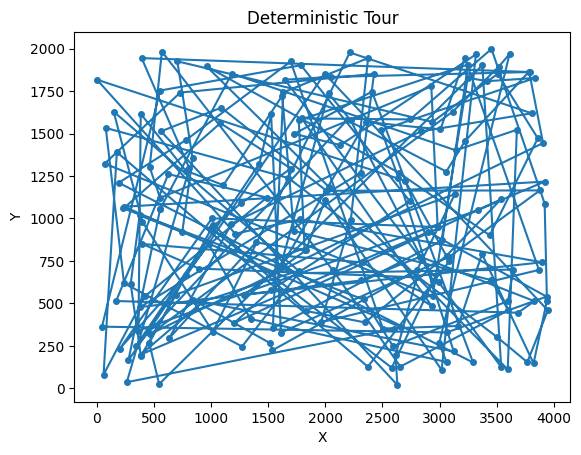

Optimal Path (City Numbers): 2 -> 4 -> 1 -> 3 -> 5 -> 7 -> 6 -> 9 -> 10 -> 11 -> 8 -> 12 -> 15 -> 14 -> 16 -> 13 -> 17 -> 19 -> 18 -> 21 -> 20 -> 23 -> 22 -> 24 -> 26 -> 25 -> 27 -> 28 -> 29 -> 32 -> 30 -> 31 -> 33 -> 35 -> 34 -> 36 -> 37 -> 38 -> 39 -> 40 -> 41 -> 42 -> 43 -> 45 -> 44 -> 48 -> 47 -> 49 -> 46 -> 51 -> 50 -> 52 -> 53 -> 55 -> 54 -> 58 -> 56 -> 59 -> 57 -> 60 -> 61 -> 62 -> 63 -> 64 -> 66 -> 65 -> 69 -> 68 -> 67 -> 70 -> 73 -> 76 -> 71 -> 74 -> 75 -> 72 -> 78 -> 77 -> 80 -> 79 -> 81 -> 82 -> 83 -> 84 -> 85 -> 86 -> 88 -> 87 -> 89 -> 92 -> 94 -> 90 -> 95 -> 91 -> 93 -> 96 -> 98 -> 99 -> 97 -> 101 -> 100 -> 104 -> 103 -> 105 -> 102 -> 106 -> 108 -> 107 -> 109 -> 110 -> 112 -> 115 -> 113 -> 117 -> 111 -> 116 -> 114 -> 118 -> 120 -> 121 -> 119 -> 123 -> 122 -> 126 -> 127 -> 124 -> 130 -> 125 -> 128 -> 129 -> 131 -> 133 -> 134 -> 132 -> 136 -> 135 -> 137 -> 140 -> 139 -> 141 -> 138 -> 142 -> 144 -> 143 -> 146 -> 145 -> 147 -> 148 -> 150 -> 149 -> 152 -> 151 -> 153 -> 154 -> 1

In [ ]:
import math
import matplotlib.pyplot as plt
import time

def load_dataset(file_path):
    cities = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines[6:-1]:
            parts = line.split()
            city_number = int(parts[0])
            x, y = float(parts[1]), float(parts[2])
            cities.append((city_number, x, y))
    return cities

def euclidean_distance(city1, city2):
    return math.sqrt((city1[1] - city2[1])**2 + (city1[2] - city2[2])**2)

def total_distance(cities, tour):
    distance = 0
    for i in range(len(tour) - 1):
        distance += euclidean_distance(cities[tour[i]], cities[tour[i + 1]])
    distance += euclidean_distance(cities[tour[-1]], cities[tour[0]])
    return distance

def two_opt_swap(tour, i, j):
    return tour[:i] + tour[i:j+1][::-1] + tour[j+1:]

def deterministic_sa(cities, initial_temp=200000, cooling_rate=0.9995, stopping_temp=1e-8, max_iter=500000):
    n = len(cities)

    # مسیر اولیه قطعی
    current_tour = list(range(n))
    current_distance = total_distance(cities, current_tour)

    best_tour = current_tour[:]
    best_distance = current_distance

    temperature = initial_temp
    iter_count = 0

    while temperature > stopping_temp and iter_count < max_iter:

        # انتخاب قطعی i و j
        i = iter_count % (n - 1)
        j = i + 1

        new_tour = two_opt_swap(current_tour, i, j)
        new_distance = total_distance(cities, new_tour)

        delta = new_distance - current_distance

        # فقط جواب بهتر پذیرفته می‌شود
        if delta < 0:
            current_tour = new_tour
            current_distance = new_distance

            if new_distance < best_distance:
                best_tour = new_tour
                best_distance = new_distance


        temperature *= cooling_rate
        iter_count += 1

    return best_tour, best_distance

def plot(cities, tour):
    tour_cities = [cities[i] for i in tour]
    tour_cities.append(tour_cities[0])
    x, y = zip(*[(city[1], city[2]) for city in tour_cities])
    plt.plot(x, y, 'o-', markersize=4)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Deterministic Tour')
    plt.show()

    print("Optimal Path (City Numbers):", ' -> '.join(str(cities[i][0]) for i in tour) + ' -> ' + str(cities[tour[0]][0]))
    print("Total Distance:", total_distance(cities, tour))


start = time.time()

cities = load_dataset("kroB200.txt")
best_tour, best_distance = deterministic_sa(cities)
plot(cities, best_tour)

end = time.time()
execution_time = end - start

print(f"Execution Time: {execution_time:.4f} seconds")
